In [76]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/boston-housing-dataset/BostonHousing.csv")

In [3]:
df.shape

(506, 14)

In [5]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [6]:
df.sample(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
382,9.18702,0.0,18.10,0,0.700,5.536,100.0,1.5804,24,666,20.2,396.90,23.60,11.3
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
111,0.10084,0.0,10.01,0,0.547,6.715,81.6,2.6775,6,432,17.8,395.59,10.16,22.8
92,0.04203,28.0,15.04,0,0.464,6.442,53.6,3.6659,4,270,18.2,395.01,8.16,22.9
275,0.09604,40.0,6.41,0,0.447,6.854,42.8,4.2673,4,254,17.6,396.90,2.98,32.0


In [9]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [57]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [58]:
df['rm'] = df['rm'].fillna(df['rm'].mean())

In [64]:
x = df.drop("medv", axis=1)
y = df['medv']

In [65]:
x.shape

(506, 13)

In [66]:
y.shape

(506,)

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [68]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [69]:
x_train.isnull().sum(), x_test.isnull().sum()

(crim       0
 zn         0
 indus      0
 chas       0
 nox        0
 rm         0
 age        0
 dis        0
 rad        0
 tax        0
 ptratio    0
 b          0
 lstat      0
 dtype: int64,
 crim       0
 zn         0
 indus      0
 chas       0
 nox        0
 rm         0
 age        0
 dis        0
 rad        0
 tax        0
 ptratio    0
 b          0
 lstat      0
 dtype: int64)

In [70]:
scaler = StandardScaler()

In [71]:
scaler.fit(x_train)

StandardScaler()

In [72]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [78]:
x_train_scaled

array([[-0.37257438, -0.49960763, -0.70492455, ..., -0.48463784,
         0.3716906 , -0.41100022],
       [-0.39709866, -0.49960763, -0.04487755, ...,  0.33649132,
         0.20501196, -0.38768057],
       [-0.402693  ,  0.77116771, -0.88675963, ..., -0.84958414,
         0.36660893, -0.18191902],
       ...,
       [-0.39805586, -0.49960763, -0.15941933, ..., -0.30216469,
         0.40342278, -0.33006734],
       [-0.38842357, -0.49960763, -0.60326872, ..., -0.25654641,
         0.38343489,  0.8359148 ],
       [-0.39951258, -0.49960763, -1.01275558, ..., -0.84958414,
         0.43041207,  0.27212814]])

In [73]:
max_depths = range(1, 26)
train_errors = []
val_errors = []

In [74]:
for depth in max_depths:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(x_train, y_train)
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_mse)
    val_errors.append(val_mse)

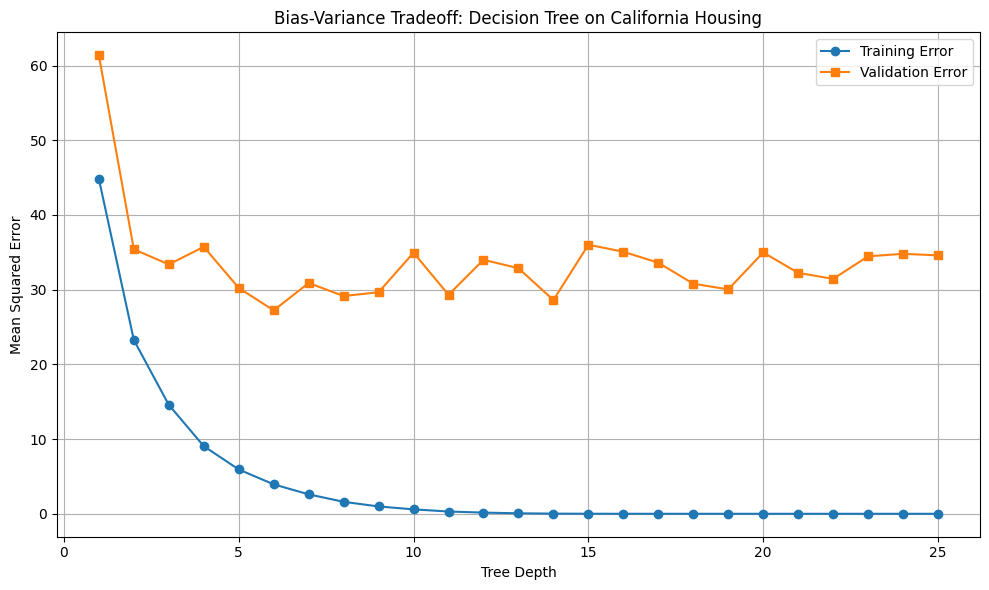

In [77]:
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_errors, label='Training Error', marker='o')
plt.plot(max_depths, val_errors, label='Validation Error', marker='s')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff: Decision Tree on California Housing')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()